# Polynomial Linear Regression

- Plot of the data point are in the form of:

### $Y = B_{0}+ B_{1}X_{1}+B_{2}X_{1}^{2}+...$ 

- Why it is still known as Linear Regression?

Since all the co-efficients($ B_{0} , B_{1} $ etc.) are linears.

## Case Study:

To create a ML model for finding annual salary of a person according to experience level.


## Code Snippet:

In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
# import dataset

dataset = pd.read_csv('Position_Salaries.csv')

In [3]:
#see dataset

dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
X = dataset.iloc[:,1:2].values
y = dataset.iloc[:,-1].values

In [7]:
#X

In [8]:
#y

There is no need of label encoding and feature scaling.
Since the datset is small so need of train and test set split.


In [10]:
# create linear regression

from sklearn.linear_model import LinearRegression

In [11]:
model_1 = LinearRegression()

In [12]:
model_1.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
model_1.predict([[6.5]])

array([330378.78787879])

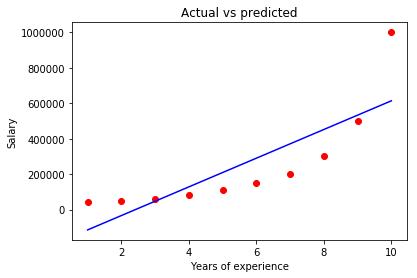

In [18]:
# plot graph

plt.scatter(X,y,color = 'red')
plt.plot(X,model_1.predict(X),color = 'blue')
plt.title('Actual vs predicted')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()

Since variation of actual values are looking like polynomial.
It is not a linear variation.
So we need a polynomial model.

In [20]:
# create polynomial model

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 4)

In [21]:
X_poly = poly.fit_transform(X)

In [22]:
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

The above step is required to convert linear values to polynomial values.

Now we can craete a linear regression model by using above polynomial value and we get Polynomial Regression Model.


In [23]:
model_2 = LinearRegression()

In [24]:
model_2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
model_2.predict(poly.fit_transform([[6.5]]))

array([158862.45265153])

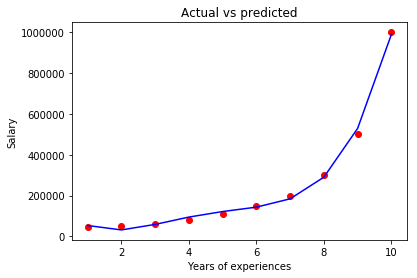

In [32]:
# create a plot and visualise the result

plt.scatter(X,y,color = 'red')
plt.plot(X,model_2.predict(poly.fit_transform(X)),color = 'blue')
plt.title('Actual vs predicted')
plt.xlabel('Years of experiences')
plt.ylabel('Salary')
plt.show()

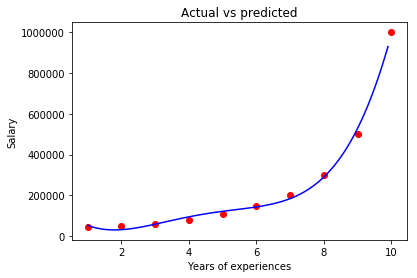

In [33]:
# let us smooothing the curve

X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X,y,color = 'red')
plt.plot(X_grid,model_2.predict(poly.fit_transform(X_grid)),color = 'blue')
plt.title('Actual vs predicted')
plt.xlabel('Years of experiences')
plt.ylabel('Salary')
plt.show()


### ------------- End of document -----------------------------